In [ ]:
pip install -U scikit-plot

In [2]:
# Importing libraries
import os 
import keras
import scikitplot
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [4]:
#Loading datafiles
trainData = pd.read_csv('SentimentTrain.txt', header =None, sep =';', names = ['text','Sentiment'], encoding='utf-8')
testData = pd.read_csv('SentimentTest.txt', header = None, sep =';', names = ['text','Sentiment'],encoding='utf-8')
valData =pd.read_csv('SentimentVal.txt',header=None,sep=';',names=['text','Sentiment'],encoding='utf-8')

In [5]:
# Print top rows of the dataset
trainData.head()

,text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
#Count of the each target class in the dataset
trainData['Sentiment'].value_counts()

joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

In [7]:
#Assign text to X variable
X = trainData['text']

#Initilaze tokenizer with 15212 seq length and replace out of vocabulary 
#with token UNK
tokenizer = Tokenizer(15212, lower = True, oov_token='UNK')

#Fitting the model on text
tokenizer.fit_on_texts(X)

In [8]:
#Convert text to sequence of words
X_train = tokenizer.texts_to_sequences(X)

# Pads sequences to the same length
X_train_pad = pad_sequences(X_train, maxlen=80, padding='post')

In [9]:
#Convert string label into integers to use in model
trainData['Sentiment'] = trainData.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [10]:
#Reading labels
Y_train = trainData['Sentiment'].values

In [11]:
#Convert into vector
Y_train_vector = to_categorical(Y_train)

In [12]:
#Same operations for validation dataset
X_validation = valData['text']
Y_validation = valData.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

X_validation_vector = tokenizer.texts_to_sequences(X_validation)
X_validation_pad = pad_sequences(X_validation_vector, maxlen=80, padding='post')

Y_validation_vector = to_categorical(Y_validation)

In [13]:
#Import model and relevant libraries 
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Embedding, Dropout

In [14]:
#Model architecture definition using Sequential Model
model = Sequential()

#Add embedding layer
model.add(Embedding(15212, 64, input_length=80))

#Add dropout to model
model.add(Dropout(0.3))

#Add Bidirectional LSTM layer with return seq true 
# True for only first LSTM layer
model.add(Bidirectional(LSTM (80, return_sequences= True)))
model.add(Bidirectional(LSTM(160)))

#Add softmax layer with number of class = 6
model.add(Dense(6, activation='softmax'))

#Print model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 64)            973568    
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
#Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#Fit model on trainData and validate on ValData while training
history = model.fit(X_train_pad, Y_train_vector, epochs = 12, validation_data = (X_validation_pad, Y_validation_vector))

Epoch 1/12
500/500 [==============================] - 228s 440ms/step - loss: 1.3921 - accuracy: 0.4464 - val_loss: 0.5077 - val_accuracy: 0.8190
Epoch 2/12
500/500 [==============================] - 215s 429ms/step - loss: 0.3750 - accuracy: 0.8667 - val_loss: 0.2502 - val_accuracy: 0.9085
Epoch 3/12
500/500 [==============================] - 212s 424ms/step - loss: 0.1812 - accuracy: 0.9328 - val_loss: 0.2293 - val_accuracy: 0.9165
Epoch 4/12
500/500 [==============================] - 222s 445ms/step - loss: 0.1252 - accuracy: 0.9552 - val_loss: 0.2107 - val_accuracy: 0.9230
Epoch 5/12
500/500 [==============================] - 215s 430ms/step - loss: 0.0899 - accuracy: 0.9651 - val_loss: 0.2044 - val_accuracy: 0.9190
Epoch 6/12
500/500 [==============================] - 211s 423ms/step - loss: 0.0746 - accuracy: 0.9717 - val_loss: 0.1897 - val_accuracy: 0.9335
Epoch 7/12
500/500 [==============================] - 214s 429ms/step - loss: 0.0680 - accuracy: 0.9736 - val_loss: 0.2261 -

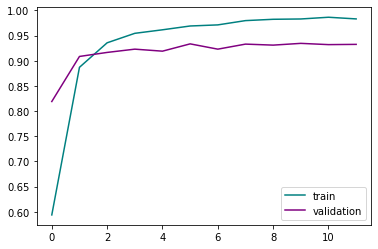

In [16]:
#Plot to show training and validation accuracy vs each epochs
plt.plot(history.history['accuracy'],c = 'teal', label = 'train')
plt.plot(history.history['val_accuracy'], c = 'purple', label = 'validation')
plt.legend(loc = 'lower right')
plt.show()

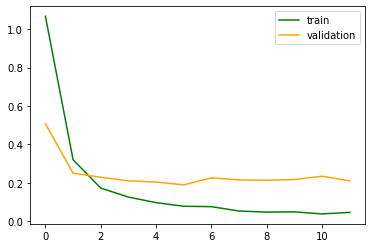

In [17]:
#Plot to show training and validation loss vs each epochs
plt.plot(history.history['loss'], c = 'g', label = 'train')
plt.plot(history.history['val_loss'], c = 'orange', label = 'validation')
plt.legend(loc = 'upper right')
plt.show()

In [18]:
#TEST the data on test dataset

#Same operations for test dataset as did in train dataset and validation dataset
X_test = testData['text']
Y_test = testData.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})
 
X_test_vector = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_vector, maxlen = 80, padding= 'post')

Y_test_vector = to_categorical(Y_test)

In [19]:
#Evaluate model on test set
model.evaluate(X_test_pad, Y_test_vector)

63/63 [==============================] - 6s 97ms/step - loss: 0.2595 - accuracy: 0.9165


[0.2594512403011322, 0.9164999723434448]

In [21]:
#Predict test labels
Y_pred = model.predict_classes(X_test_pad)

In [22]:
#Print evaluation in form of classification report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       695
           1       0.93      0.92      0.92       275
           2       0.77      0.79      0.78       159
           3       0.95      0.97      0.96       581
           4       0.88      0.89      0.89       224
           5       0.74      0.74      0.74        66

    accuracy                           0.92      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.92      0.92      0.92      2000



In [23]:
#Function to take sentence and printing the predicted emotion
def get_key(value):
    emotions = {'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key, val in emotions.items():
        if(val == value):
            return key

In [29]:
def predict(sentence):
    sentence_lst = []
    sentence_lst.append(sentence)
    sentence_seq = tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded = pad_sequences(sentence_seq, maxlen = 80, padding = 'post')
    answer = get_key(model.predict_classes(sentence_padded))
    print("The sentence is: ", sentence)
    print("The emotion prediction is: ", answer)
    print("\n")

In [30]:
sadness_sentence = "I feel so shamed that I want to give up"
predict(sadness_sentence)

love_sentence = "I feel like a faithful servant"
predict(love_sentence)

anger_sentence = "Hate you"
predict(anger_sentence)

joy_sentence = "I am so happy"
predict(joy_sentence)

fear_sentence = "I was feeling frightened to the core what if my friends laughed at me what if sir was too harsh what if"
predict(fear_sentence)

surprise_sentence = "I feel a funny mix of emotions"
predict(surprise_sentence)

The sentence is:  I feel so shamed that I want to give up
The emotion prediction is:  sadness


The sentence is:  I feel like a faithful servant
The emotion prediction is:  joy


The sentence is:  Hate you
The emotion prediction is:  anger


The sentence is:  I am so happy
The emotion prediction is:  joy


The sentence is:  I was feeling frightened to the core what if my friends laughed at me what if sir was too harsh what if
The emotion prediction is:  fear


The sentence is:  I feel a funny mix of emotions
The emotion prediction is:  surprise


